In [56]:
from math import sin, cos, log
import timeit
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [57]:
g = 9.8
v_t = 4.9
C_D = 1/5.0
C_L = 1.0
v0 = 6.5
theta0 = -0.1
x0 = 0.0
y0 = 2.0

In [58]:
def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2, -g*cos(theta)/v + g/v_t**2*v, v*cos(theta), v*sin(theta)])

def euler_step(u, f, dt):
    return u + dt * f(u)

def get_diffgrid(u_current, u_fine, dt):
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
    grid_size_ratio = numpy.ceil(N_fine/float(N_current))
    diff_grid = dt * numpy.sum(numpy.abs(u_current[:,2] - u_fine[::grid_size_ratio,2]))
    return diff_grid

In [59]:
def rk2_step(u, f, dt):
    u_star = u + 0.5*dt*f(u)
    return u + dt*f(u_star)

In [60]:
T = 15.0
dt = 0.01
N = int(T/dt) + 1
u_euler = numpy.empty((N,4))
u_euler1 = numpy.empty((N,4))
u_rk2 = numpy.empty((N,4))
u_euler[0] = numpy.array([v0, theta0, x0, y0])
u_euler1[0] = numpy.array([v0, theta0, x0, y0])
u_rk2[0] = numpy.array([v0, theta0, x0, y0])

#count=N-1
#def euler_step1(n, u_euler1[n], f, dt, count):
#    if count == 0:
#        return u_euler1[n+1] = u_euler1[n] + dt * f(u_euler1[n])
#    else:
#        euler_step1(n+1, u_euler1[n+1], f, dt, count = count-1)

#euler_step1(0, u_euler1[0], f, dt, count)
start_etime = timeit.default_timer()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
elapsed_etime = timeit.default_timer() - start_etime


start_rtime = timeit.default_timer()
for n in range(N-1):
    u_rk2[n+1] = rk2_step(u_rk2[n], f, dt)
    
elapsed_rtime = timeit.default_timer() - start_rtime

print('Time taken for Euler computations is:', elapsed_etime)
print('Time taken for RK2 computations is:', elapsed_rtime)

('Time taken for Euler computations is:', 0.027772528225796123)
('Time taken for RK2 computations is:', 0.05255911145195569)


In [61]:
x_euler = u_euler[:,2]
#x_euler1 = u_euler1[:,2]
y_euler = u_euler[:,3]
x_rk2 = u_rk2[:,2]
y_rk2 = u_rk2[:,3]

In [62]:
#pyplot.figure(figsize=(10,6))
#pyplot.subplot(129)
#pyplot.grid(True)
#pyplot.xlabel('euler1')
#pyplot.ylabel('euler')
#pyplot.plot(x_euler1, x_euler)

In [63]:
idx_negative_euler = numpy.where(y_euler<0.0)[0]
if len(idx_negative_euler) == 0:
    idx_ground_euler = N-1
    print('Euler integration hasn\'t touched the ground yet')
else:
    idx_ground_euler = idx_negative_euler[0]

idx_negative_rk2 = numpy.where(y_rk2<0.0)[0]
if len(idx_negative_rk2) == 0:
    idx_ground_rk2 = N-1
    print('RK2 integration hasn\'t touched the ground yet')
else:
    idx_ground_rk2 = idx_negative_rk2[0]

In [64]:
print('Are the x values close? {}'.format(numpy.allclose(x_euler, x_rk2)))
print('Are the y values close? {}'.format(numpy.allclose(y_euler, y_rk2)))

Are the x values close? False
Are the y values close? False


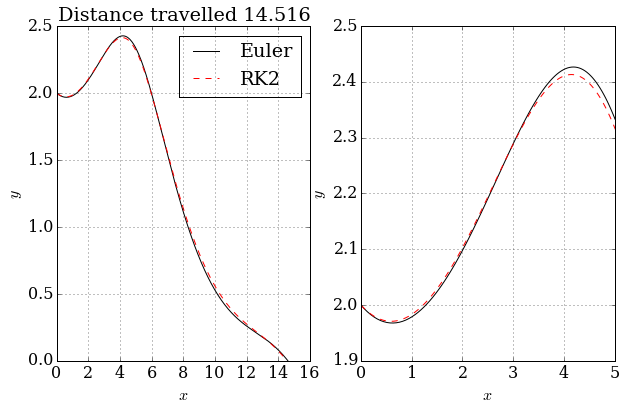

In [65]:
pyplot.figure(figsize=(10,6))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler], 'k-', label='Euler')
pyplot.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2], 'r--', label='RK2')
pyplot.title('Distance travelled {:.3f}'.format(x_rk2[idx_ground_rk2-1]))
pyplot.legend();

pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_euler, y_euler, 'k-', label='Euler')
pyplot.plot(x_rk2, y_rk2, 'r--', label='RK2')
pyplot.xlim(0,5)
pyplot.ylim(1.9,2.5);

In [66]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt) + 1
    t = numpy.linspace(0., T, N)
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range(N-1):
        u[n+1] = rk2_step(u[n], f, dt)
    
    u_values[i] = u

In [67]:
diff_grid = numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    diff_grid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

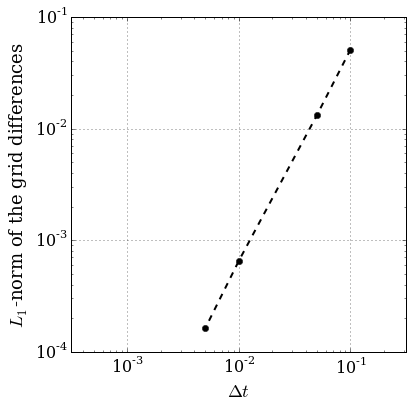

In [68]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.xlim(1e-4,1)
pyplot.ylim(1e-4,1)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diff_grid[:-1], color='k', ls='--', lw=2, marker='o')

In [69]:
r = 2
h = 0.001

dt_values = numpy.array([h, r*h, r**2*h])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0.0, T, N)
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0, theta0, x0, y0])
    for n in range(N-1):
        u[n+1] = rk2_step(u[n], f, dt)
        
    u_values[i] = u

alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)
print('The order of convergence is alpha = {:.3f}'.format(alpha))

The order of convergence is alpha = 1.983


In [70]:
def leapfrog_step(unm1, u, f, dt):
    return unm1 + 2.0*dt*f(u)

In [89]:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9    # trim velocity in m s^{-1}   
C_D = 1/5.0  # drag coefficient --- or D/L if C_L=1
C_L = 1.0    # for convenience, use C_L = 1

### set initial conditions ###
v0 = 6.5     # start at the trim velocity (or add a delta)
theta0 = -0.1 # initial angle of trajectory
x0 = 0.0     # horizotal position is arbitrary
y0 = 2.0     # initial altitude

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                             # set time-increment
N  = int(T/dt) + 1                   # number of time-steps

u_leapfrog = numpy.empty((N,4))
u_leapfrog[0] = numpy.array([v0, theta0, x0, y0])
u_leapfrog[1] = rk2_step(u_leapfrog[0], f, dt)

In [90]:
for n in range(1,N-1):
    u_leapfrog[n+1] = leapfrog_step(u_leapfrog[n-1], u_leapfrog[n], f, dt)

In [91]:
x_leapfrog = u_leapfrog[:,2]
y_leapfrog = u_leapfrog[:,3]

idx_negetive_leapfrog = numpy.where(y_leapfrog<0.0)[0]
if len(idx_negetive_leapfrog)==0:
    idx_ground_leapfrog = N-1
    print('The glider hasn\'t touched the ground yet')
else:
    idx_ground_leapfrog = idx_negetive_leapfrog[0]

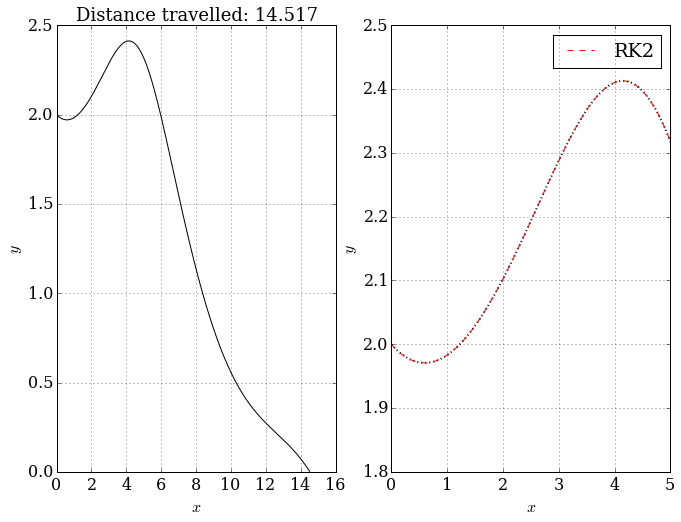

In [92]:
pyplot.figure(figsize=(11,8))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
#pyplot.xlim(120, 125)
#pyplot.ylim(0, 3)
pyplot.plot(x_leapfrog[:idx_ground_leapfrog], y_leapfrog[:idx_ground_leapfrog], color='k', ls='-', lw=1)
pyplot.title('Distance travelled: {:.3f}'.format(x_leapfrog[idx_ground_leapfrog-1]), fontsize=18);

pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_leapfrog[:idx_ground_leapfrog], y_leapfrog[:idx_ground_leapfrog], color='k', ls=':', lw=2)
pyplot.plot(x_rk2, y_rk2, 'r--', label='RK2')
pyplot.xlim(0,5)
pyplot.ylim(1.8,2.5)
pyplot.legend();

In [93]:
# check convergence rate
r = 2
h = 0.001

dt_values = numpy.array([h, r*h, r**2*h])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt) + 1   # number of time-steps
    
    ### discretize the time t ###
    t = numpy.linspace(0.0, T, N)
    
    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    # time loop
    u[1] = rk2_step(u[0], f, dt)
    for n in range(1, N-1):
        u[n+1] = leapfrog_step(u[n-1], u[n], f, dt)
    
    # store the value of u related to one grid
    u_values[i] = u
    
# calculate the order of convergence
alpha = (log(get_diffgrid(u_values[2], u_values[1], dt_values[2])) 
         - log(get_diffgrid(u_values[1], u_values[0], dt_values[1]))) / log(r)

print('The order of convergence is alpha = {:.3f}'.format(alpha))

The order of convergence is alpha = 2.186
